# scipy-stats
**Machine Learning & Statistics 2021**

<img src="images/SCIPY_2.svg" alt="scipy" style="width: 200px;"/>

[scipy.org](https://scipy.org/)

## 1.0 Introduction

SciPy short for Scientific Python, is a free & open-source Python library used for scientific and technical computing. It is a collection of mathematical algorithms and convenience functions built on the NumPy [NumPy](https://numpy.org/) python package.

SciPy contains modules for optimization, linear algebra, integration, interpolation, and other tasks common in science and engineering. [1](#References)

SciPy is organized into the various subpackages & scientific computing domains, below is a summary of some of these subpackages:

- constants - Physical and mathematical constants
- integrate - Integration and ordinary differential equation solvers
- interpolate - Interpolation and smoothing splines
- linalg - Linear algebra
- optimize - Optimization and root-finding routines
- special - Special functions
- stats - Statistical distributions and functions

Refer to the [SciPy introduction page](https://scipy.github.io/devdocs/tutorial/general.html) for a full list of subpackages available.

SciPy package in Python is the most used Scientific library only second to GNU Scientific Library for C/C++ or Matlab’s.

## 1.1 SciPy Stats

The SciPy stats module contains a large number of statistical functions, probability distributions, summary & frequency statistics, correlation functions and statistical tests.

Refer to the [SciPy reference page](https://docs.scipy.org/doc/scipy/reference/stats.html) for a full list of statistical functions, distributions & tests available.

Alternatively the ```sp.info(stats)``` function can be called to display the SciPy Stats Reference Manual.

## 1.2 SciPy Stats - Descriptive Statistics & Probability Distributions

Scipy has many functions for computing statistical values, e.g SciPy ```describe``` function that will return the number of values within an array or set, the min & max values, the variance, skew & kurtosis.

Scipy has functions that deal with several common probability distributions. The distributions types consist of continuous distributions, discrete distributions & multivariate distributions.  SciPy currently contains 81 continuous probability distributions and 10 discrete distributions.


In [1]:
import pandas as pd
from scipy import stats
from scipy.stats import norm, expon
import scipy as sp
from numpy.random import default_rng
from matplotlib import pyplot as plt
import seaborn as sns

In [51]:
# set plot style
plt.style.use("ggplot")

# Increase the size of the output plots
plt.rcParams["figure.figsize"] = (10,7)

Using SciPy probability distributions function to generate random variables normally distributed & expontentially distributed.

In [52]:
# set seed for random number generator
seed = 1
rng = default_rng(seed)

# Using scipy to generate normal continuous random variables
n = norm.rvs(loc=10, size=1000, scale=1, random_state=rng)

# Using scipy to generate exponential continuous random variables
e = expon.rvs(loc=10, size=1000)

Plot of distributions

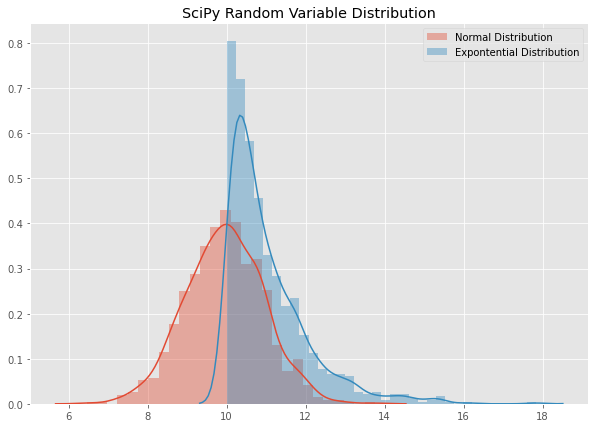

In [53]:
sns.distplot(n, label="Normal Distribution")
sns.distplot(e, label="Expontential Distribution")
plt.legend()
plt.title("SciPy Random Variable Distribution")
plt.show()

Using SciPy describe function

In [54]:
# SciPy describe function - Normal Distribution
num, min_max, mean, var, skew, kurt = stats.describe(n)
print(f"Number of Elements = {num}")
print(f"Min = {min_max[0]:.3f}")
print(f"Max = {min_max[1]:.3f}")
print(f"Mean = {mean:.3f}")
print(f"Variance = {var:.3f}")
print(f"Skew = {skew:.3f}")
print(f"Kurtosis = {kurt:.3f}")

Number of Elements = 1000
Min = 6.451
Max = 13.752
Mean = 9.946
Variance = 0.974
Skew = 0.003
Kurtosis = 0.182


In [65]:
# SciPy describe function - Expontential Distribution
num, min_max, mean, var, skew, kurt = stats.describe(e)
print(f"Number of Elements = {num}")
print(f"Min = {min_max[0]:.3f}")
print(f"Max = {min_max[1]:.3f}")
print(f"Mean = {mean:.3f}")
print(f"Variance = {var:.3f}")
print(f"Skew = {skew:.3f}")
print(f"Kurtosis = {kurt:.3f}")

Number of Elements = 1000
Min = 10.000
Max = 17.825
Mean = 11.042
Variance = 1.058
Skew = 1.914
Kurtosis = 4.947


## 1.3 Hypothesis Testing

Hypothesis tests or Statistical Hypothesis Testing, is a technique used to compare two datasets, or a sample from a dataset. It is a statistical inference method, which allows conclusions to be made or infer something about the two datasets or the entire population based on the sample dataset.

A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data, these statements are known as the Null hypothesis (Ho) & the Alternative hypothesis (Ha).

**Null Hypothesis** is a general statement or default position that there is no relationship between two measured phenomena.

**Alternative Hypothesis** is contrary to the null hypothesis, it is usually taken to be that the observations are the result of a real effect (with some amount of chance variation superposed).

As an example of hypothesis testing, a group of employees within a workplace had their heights measured & gender recorded. 

The Null Hypotheses could be formulated as follows: there is no correlation between height & gender in the workplace, and there is not a difference in height between males & females. The objective of Hypothesis Testing is to verify if the Null Hypothesis can be rejected or not. In general, rejecting the Null Hypothesis does not automatically mean that the alternative hypothesis is accepted. [2](#References)

Hypothesis tests are based on the notion of critical regions, a critical region, also known as the rejection region, is a set of values for the test statistic for which the null hypothesis is rejected. i.e. if the observed test statistic is in the critical region then the null hypothesis is rejected & the alternative hypothesis is accepted. 

<img src="images/critical_region.jpeg" alt="critical_region" style="width: 600px;"/>

**Fig 2 - Critical Region -** [towardsdatascience.com, hypothesis testing](https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce)

Hypothesis testing types:

1. T Test ( Student T test)
2. Z Test
3. ANOVA Test
4. Chi-Square Test

## 1.4 Independent two sample t-test

Diabetes dataset - The dataset consists of a 21 × 2 matrix, with the first column containing the blood pressure rates of the diabetic men, and the second column the blood pressure rates of the non-diabetic men.

Dataset Source: 

Trinity College Dublin, School of Computer Science and Statistics

https://www.scss.tcd.ie/~arwhite/Teaching/ST1252/diabetes_sim.csv

Is there a statistically significant difference in blood pressure rates between men with diabetes & men that don't have diabetes?

**Null Hypothesis** - There is no difference in blood pressure rates between the diabetic & non-diabetic males.

**Alternative Hypothesis** - There is a statistically significant difference in the average post blood pressure blood pressure rates between the diabetic & non-diabetic males.

Dependent variable = Blood Pressure Rates

Independent variable = Diabetes / Non Diabetes

In [63]:
# Load the dataset using Pandas
df = pd.read_csv("diabetes_sim.csv")
df.describe()

,Diabetes,Non-diabetes
count,21.000000,21.000000
mean,152.779073,140.946174
std,18.223272,15.438100
min,116.137244,102.391994
25%,146.610352,131.431935
50%,156.074434,142.997080
75%,167.400923,152.542535
max,175.390456,168.306846


In [57]:
num, min_max, mean, var, skew, kurt = stats.describe(df["Diabetes"])
print("Diabetes - Blood Pressures")
print(f"Min = {min_max[0]:.3f}")
print(f"Max = {min_max[1]:.3f}")
print(f"Mean = {mean:.3f}")
print(f"Variance = {var:.3f}")

Diabetes - Blood Pressures
Min = 116.137
Max = 175.390
Mean = 152.779
Variance = 332.088


In [58]:
num, min_max, mean, var, skew, kurt = stats.describe(df["Non-diabetes"])
print("Non-Diabetes - Blood Pressures")
print(f"Min = {min_max[0]:.3f}")
print(f"Max = {min_max[1]:.3f}")
print(f"Mean = {mean:.3f}")
print(f"Variance = {var:.3f}")

Non-Diabetes - Blood Pressures
Min = 102.392
Max = 168.307
Mean = 140.946
Variance = 238.335


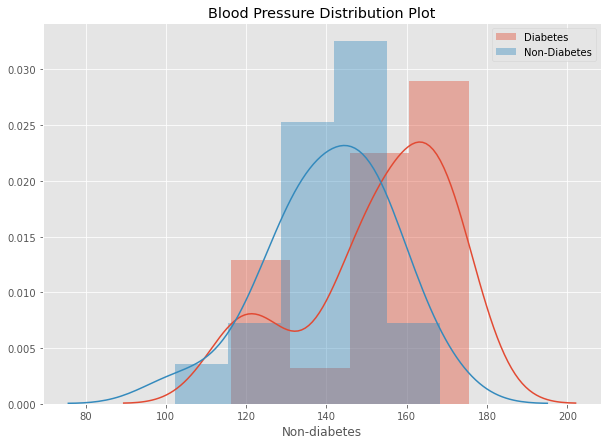

In [59]:
sns.distplot(df["Diabetes"], label="Diabetes")
sns.distplot(df["Non-diabetes"], label="Non-Diabetes")
plt.title("Blood Pressure Distribution Plot")
plt.legend()
plt.show()

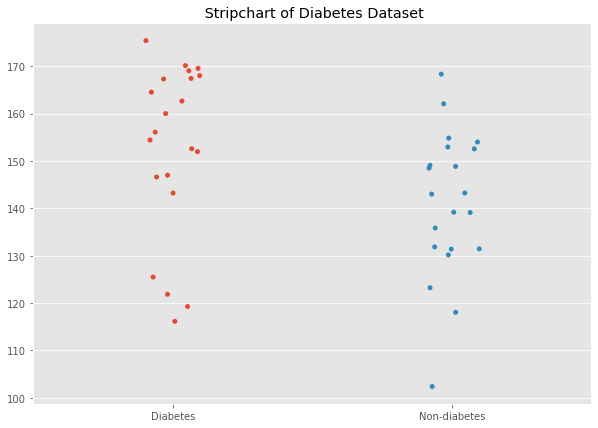

In [60]:
sns.stripplot(data=df)
plt.title(" Stripchart of Diabetes Dataset")
plt.show()

In [61]:
# SciPy independt t-test
stats.ttest_ind(df["Diabetes"], df["Non-diabetes"])

Ttest_indResult(statistic=2.270400506474127, pvalue=0.02864203881273947)

**Interpretation:**
There is a statistically significant difference in the average post blood pressure blood pressure rates between the diabetic & non-diabetic males.

**Assumptions**

There are six assumptions that are required to be passed inorder for an independent t-test to provide a valid result.

**Assumption 1**: *Dependent variables should be measured on a continuous scale.*

Blood pressures are measured on a continous scale from min pressure = 102 to max pressure = 175

**Assumption 2**: *Independent variables should consist of two categorical, independent groups.*

Independent variable consists of two categories - Diabetic or Non-Diabetic

**Assumption 3**: *Independence of observations.*

Test results are from different individuals, i.e no individual has had their blood pressure recorded twice. 

**Assumption 4**: *There should be no significant outliers.*

From reviewing the above plots, there appears to be no significant outliers, although the distribution shape of the diabetes blood pressure ratings appears slightly skewed due to the cluster of values around the 120 mark and the lack of test readings from 130 to 140.  

**Assumption 5**: *Dependent variables should be approximately normally distributed for each group of the independent variables.*

Normality using the Shapiro-Wilk test of normality.

In [75]:
difference = df['Diabetes'] - df['Non-diabetes']

In [70]:
stats.shapiro(difference)

ShapiroResult(statistic=0.9380834102630615, pvalue=0.19965507090091705)

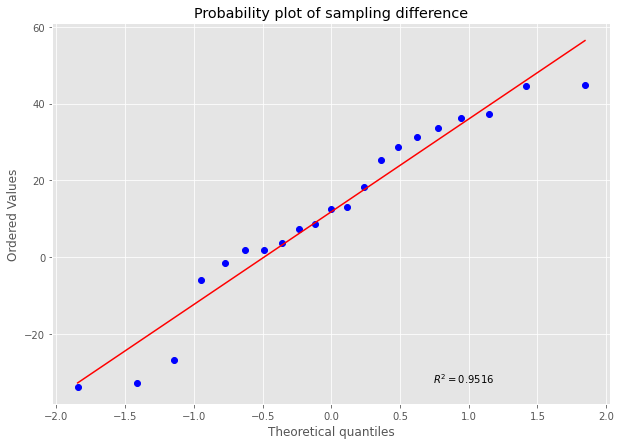

In [74]:
normality_plot, stat = stats.probplot(difference, plot= plt, rvalue= True)
plt.title("Probability plot of sampling difference")
plt.show()

The data points closely fit the expected diagonal pattern for a normal distribution, there are a few small deviations at the bottom of the plot, which is to be expected given the small data sample size.

**Assumption 6**: *Homogeneity of variances.*

## References

[1] [wikipedia.org, SciPy](https://en.wikipedia.org/wiki/SciPy)

[2] [towardsdatascience.com, Hypothesis Tests Explained](https://towardsdatascience.com/hypothesis-tests-explained-8a070636bd28#:~:text=Types%20of%20Hypothesis%20Tests,not%20follow%20a%20normal%20distribution.)

https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

https://www.kaggle.com/kappernielsen/independent-t-test-example

https://www.pythonfordatascience.org/independent-samples-t-test-python/